<a href="https://colab.research.google.com/github/benamaranermine/predict-live-birth-occurrence-before-in-vitro-fertilization-treatment/blob/main/GaiaModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # filter the warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
from numpy import genfromtxt
import csv
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC, LinearSVC
from google.colab import drive



In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [20]:

file_path = '/content/drive/MyDrive/CasosFIV_Gaia_reduced.xlsx'
data = pd.read_excel(file_path)


In [ ]:
data

,Live birth occurrence,Egg source,Patient age at treatment,Causes of infertility - tubal disease,Total number of previous live births - IVF or DI,Total number of previous pregnancies - IVF and DI,Causes of infertility - endometriosis,Causes of infertility - ovulatory disorder,Total number of previous IVF cycles,Total number of previous DI cycles,Sperm source,Partner age
0,1,1,32,0,0,0,0,0,0,0,1,32.000000
1,1,1,35,0,0,1,0,0,3,1,1,44.000000
2,1,1,31,0,0,0,0,0,0,2,0,37.314607
3,1,0,35,0,1,1,0,1,1,0,1,38.000000
4,1,1,36,0,0,0,0,0,0,0,0,37.314607
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,1,41,0,0,1,0,0,3,0,1,40.000000
107,0,1,43,0,2,3,0,0,0,0,1,42.000000
108,0,0,44,0,3,3,0,0,0,0,1,37.314607
109,0,1,20,0,0,0,0,1,0,0,1,23.000000


Exploratory Data Analysis


As data scientists, we usually use the words EDA and Data Visualization interchangeably. However, EDA is an approach to data analysis that uses a variety of techniques, and one of them is Data Visualization (also called Graphical EDA).

Before Visualizing (Non-Graphical EDA)

In [ ]:
data.shape

(111, 12)

In [ ]:
for col in data:
    print(f"{col} has : {data[col].unique()} unique values\n")

Live birth occurrence has : [1 0 2] unique values

Egg source has : [1 0] unique values

Patient age at treatment has : [32 35 31 36 29 39 34 27 33 30 38 44 43 40 41 45 51 50 46 42 28 37 23 26
 20] unique values

Causes of infertility - tubal disease has : [0 1] unique values

Total number of previous live births - IVF or DI has : [0 1 2 3] unique values

Total number of previous pregnancies - IVF and DI has : [0 1 2 3 5 4] unique values

Causes of infertility - endometriosis has : [0 1] unique values

Causes of infertility - ovulatory disorder has : [0 1] unique values

Total number of previous IVF cycles has : [0 3 1 2 4] unique values

Total number of previous DI cycles has : [0 1 2 3 4] unique values

Sperm source has : [1 0] unique values

Partner age has : [32.         44.         37.31460674 38.         35.         36.
 30.         33.         37.         50.         42.         40.
 49.         43.         46.         34.         29.         31.
 59.         45.         41.    

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Live birth occurrence                              111 non-null    int64  
 1   Egg source                                         111 non-null    int64  
 2   Patient age at treatment                           111 non-null    int64  
 3   Causes of infertility - tubal disease              111 non-null    int64  
 4   Total number of previous live births - IVF or DI   111 non-null    int64  
 5   Total number of previous pregnancies - IVF and DI  111 non-null    int64  
 6   Causes of infertility - endometriosis              111 non-null    int64  
 7   Causes of infertility - ovulatory disorder         111 non-null    int64  
 8   Total number of previous IVF cycles                111 non-null    int64  
 9   Total numb

In [ ]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Live birth occurrence,111.0,0.441441,0.582856,0.0,0.0,0.000000,1.0,2.0
Egg source,111.0,0.783784,0.413530,0.0,1.0,1.000000,1.0,1.0
Patient age at treatment,111.0,35.369369,5.900582,20.0,30.0,35.000000,40.0,51.0
Causes of infertility - tubal disease,111.0,0.027027,0.162898,0.0,0.0,0.000000,0.0,1.0
Total number of previous live births - IVF or DI,111.0,0.324324,0.689692,0.0,0.0,0.000000,0.0,3.0
Total number of previous pregnancies - IVF and DI,111.0,0.585586,1.171390,0.0,0.0,0.000000,1.0,5.0
Causes of infertility - endometriosis,111.0,0.072072,0.259780,0.0,0.0,0.000000,0.0,1.0
Causes of infertility - ovulatory disorder,111.0,0.081081,0.274198,0.0,0.0,0.000000,0.0,1.0
Total number of previous IVF cycles,111.0,0.486486,0.882814,0.0,0.0,0.000000,1.0,4.0
Total number of previous DI cycles,111.0,0.378378,0.924948,0.0,0.0,0.000000,0.0,4.0


In [ ]:
data.isnull().sum()


Live birth occurrence                                0
Egg source                                           0
Patient age at treatment                             0
Causes of infertility - tubal disease                0
Total number of previous live births - IVF or DI     0
Total number of previous pregnancies - IVF and DI    0
Causes of infertility - endometriosis                0
Causes of infertility - ovulatory disorder           0
Total number of previous IVF cycles                  0
Total number of previous DI cycles                   0
Sperm source                                         0
Partner age                                          0
dtype: int64

In [21]:
def convert_to_binary_classification(df):
    # Copy the original DataFrame
    data = df.copy()


    # Set values greater than 1 to 1, and the rest to 0
    data["Live birth occurrence"] = data["Live birth occurrence"].apply(lambda x: 1 if x >= 1 else 0)


    return data


# Assume `df` is your original DataFrame


# Convert the "Live-birth Occurrence" column to binary classification
data = convert_to_binary_classification(data)


# Display the result
print(data["Live birth occurrence"])





0      1
1      1
2      1
3      1
4      1
      ..
106    0
107    0
108    0
109    0
110    0
Name: Live birth occurrence, Length: 111, dtype: int64


2- Graphical EDA
Univariate analysis is simply the analysis of one variable at a time.


*   For categorical features, we want to know the number of unique classes and how frequently they occur.

*   For numerical features, we want to know the range of values present and how often these values (or groups of values) occur.




In [ ]:
data.isnull().sum()


Live birth occurrence                                0
Egg source                                           0
Patient age at treatment                             0
Causes of infertility - tubal disease                0
Total number of previous live births - IVF or DI     0
Total number of previous pregnancies - IVF and DI    0
Causes of infertility - endometriosis                0
Causes of infertility - ovulatory disorder           0
Total number of previous IVF cycles                  0
Total number of previous DI cycles                   0
Sperm source                                         0
Partner age                                          0
dtype: int64

<Figure size 1000x800 with 0 Axes>

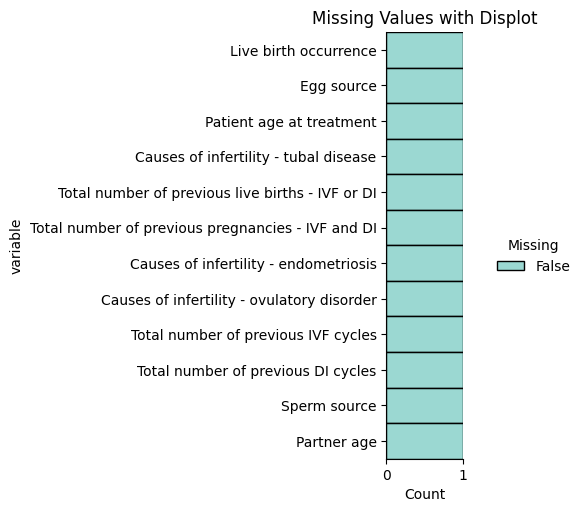

In [ ]:
plt.figure(figsize=(10,8))
sns.displot(
    data=data.isna().melt(value_name="Missing"),
    y="variable",
    hue="Missing",
    multiple="fill",
    palette = "GnBu"
)
plt.title('Missing Values with Displot')
plt.show()

Now let's look at unique values in data columns

In [ ]:
for col in data:
    print(f"{col} has : {data[col].unique()} unique values\n")

Live birth occurrence has : [1 0] unique values

Egg source has : [1 0] unique values

Patient age at treatment has : [32 35 31 36 29 39 34 27 33 30 38 44 43 40 41 45 51 50 46 42 28 37 23 26
 20] unique values

Causes of infertility - tubal disease has : [0 1] unique values

Total number of previous live births - IVF or DI has : [0 1 2 3] unique values

Total number of previous pregnancies - IVF and DI has : [0 1 2 3 5 4] unique values

Causes of infertility - endometriosis has : [0 1] unique values

Causes of infertility - ovulatory disorder has : [0 1] unique values

Total number of previous IVF cycles has : [0 3 1 2 4] unique values

Total number of previous DI cycles has : [0 1 2 3 4] unique values

Sperm source has : [1 0] unique values

Partner age has : [32.         44.         37.31460674 38.         35.         36.
 30.         33.         37.         50.         42.         40.
 49.         43.         46.         34.         29.         31.
 59.         45.         41.      

# Count Plot

Target variable :Live birth occurrence

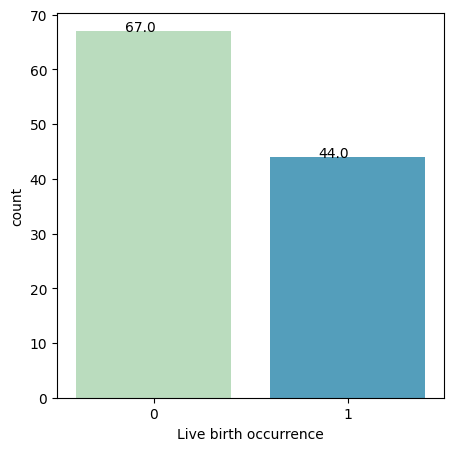

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = data['Live birth occurrence'], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Live birth occurrence', round(data['Live birth occurrence'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Live birth occurrence', round(data['Live birth occurrence'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Live birth occurrence 60.36 % of the dataset
Live birth occurrence 39.64 % of the dataset


we can see that we have unbalanced data

# corrolation

<Axes: >

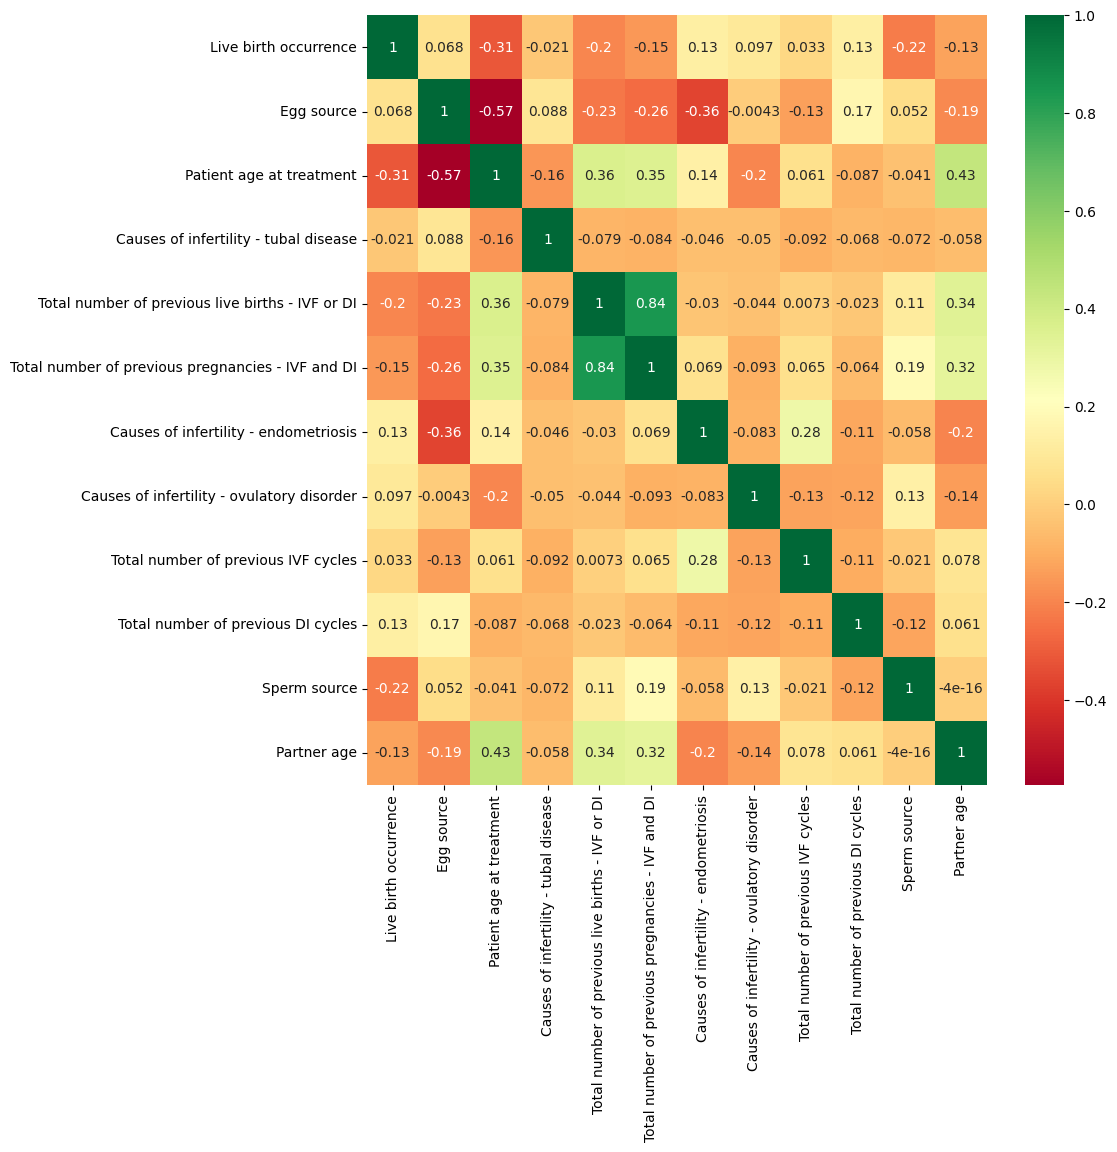

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(method='pearson'),cbar=True,cmap='RdYlGn',annot=True)

In [ ]:
# Most predominante variable
#Lets you know which variables have the most influence on Live birth occurrence
numeric_data = data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
Num_feature = numeric_corr["Live birth occurrence"].sort_values(ascending=False).head(22).to_frame()
z = Num_feature.drop(["Live birth occurrence"])
cm = sns.light_palette("#5F9EA0", as_cmap=True)
style = z.style.background_gradient(cmap=cm)
style

,Live birth occurrence
Causes of infertility - endometriosis,0.130247
Total number of previous DI cycles,0.127043
Causes of infertility - ovulatory disorder,0.096652
Egg source,0.067714
Total number of previous IVF cycles,0.033418
Causes of infertility - tubal disease,-0.021487
Partner age,-0.129309
Total number of previous pregnancies - IVF and DI,-0.154243
Total number of previous live births - IVF or DI,-0.195028
Sperm source,-0.218498


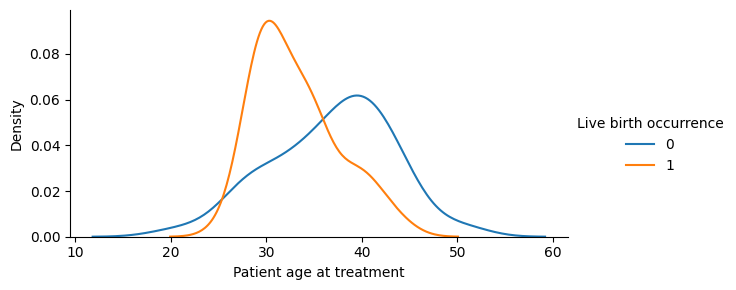

In [ ]:
grid=sns.FacetGrid(data,hue='Live birth occurrence',aspect=2)
grid.map(sns.kdeplot,'Patient age at treatment')
grid.add_legend()

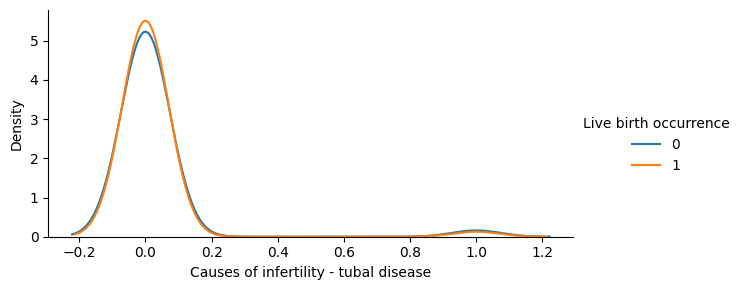

In [ ]:
grid=sns.FacetGrid(data,hue='Live birth occurrence',aspect=2)
grid.map(sns.kdeplot,'Causes of infertility - tubal disease')
grid.add_legend()

In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset into the 'data' DataFrame

# Calculate Age1 and Age2 based on the provided equations
data['Age1'] = ((np.maximum(data['Patient age at treatment'], 28.0) ** 3) + (np.maximum(data['Patient age at treatment'], 37.0) ** 3) * (14 / 5) + (np.maximum(data['Patient age at treatment'], 42.0) ** 3) * (9 / 5)) / (14 ** 2)
data['Age2'] = ((np.maximum(data['Patient age at treatment'], 34.0) ** 3) + (np.maximum(data['Patient age at treatment'], 37.0) ** 3) * (9 / 5) + (np.maximum(data['Patient age at treatment'], 42.0) ** 3) * (4 / 5)) / (14 ** 2)

# Calculate XB based on the provided equation
data['XB'] = -1.2870 + (0.0034 * data['Patient age at treatment']) + (-0.1249 * data['Age1']) + (0.1197 * data['Age2']) + \
             (-0.1052 * data['Causes of infertility - tubal disease'])


# Define the predictors and the target variable
X = data[['XB','Total number of previous live births - IVF or DI',
    'Total number of previous pregnancies - IVF and DI',
    'Causes of infertility - endometriosis',
    'Causes of infertility - ovulatory disorder',
    'Total number of previous IVF cycles',
    'Total number of previous DI cycles','Patient age at treatment','Causes of infertility - tubal disease'
          ]]  # You can include other relevant predictors if available
y = data['Live birth occurrence']



In [23]:
# Split the dataset
SEED = 23
X_new_train, X_new_test, y_new_train, Y_new_test = train_test_split(X, y, test_size=0.3,shuffle=True, stratify=y, random_state=SEED)

In [24]:

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_new_train, y_new_train)

# Make predictions on the test set to get probabilities
probabilities = model.predict_proba(X_new_test)[:, 1]
# Find the ages and tubes in the 'data' DataFrame using the indices from X_new_test
ages_in_data = data.loc[X_new_test.index, 'Patient age at treatment']
tubes = data.loc[X_new_test.index, 'Causes of infertility - tubal disease']
result_df = pd.DataFrame({
    'Patient age at treatment':ages_in_data,
    'Causes of infertility - tubal disease':  tubes,
    'Predicted Probability': probabilities
})

# Display the result DataFrame
result_df



,Patient age at treatment,Causes of infertility - tubal disease,Predicted Probability
89,30,0,0.518747
54,38,0,0.285015
95,42,0,0.200984
98,41,0,0.385601
4,36,0,0.354026
93,39,0,0.315393
20,39,0,0.275683
1,35,0,0.550557
85,29,0,0.525907
73,23,0,0.688280


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the subset of predictor columns used during training
predictor_columns = ['XB','Total number of previous live births - IVF or DI',
    'Total number of previous pregnancies - IVF and DI',
    'Causes of infertility - endometriosis',
    'Causes of infertility - ovulatory disorder',
    'Total number of previous IVF cycles',
    'Total number of previous DI cycles','Patient age at treatment','Causes of infertility - tubal disease']

# Extract the subset of features from X_new_test
X_new_test_subset = X_new_test[predictor_columns]

# Make predictions on the data to get predicted classes
predicted_classes = model.predict(X_new_test_subset)

# Calculate the evaluation metrics
accuracy = accuracy_score(Y_new_test, predicted_classes)
accuracy = accuracy_score(Y_new_test, predicted_classes)
precision = precision_score(Y_new_test, predicted_classes)
recall = recall_score(Y_new_test, predicted_classes)
f1 = f1_score(Y_new_test, predicted_classes)
roc_auc = roc_auc_score(Y_new_test, probabilities)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

Accuracy: 0.7647058823529411
Precision: 0.6923076923076923
Recall: 0.6923076923076923
F1 Score: 0.6923076923076923
ROC AUC: 0.706959706959707


#Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(X_new_train,y_new_train)

RandomForestClassifier(n_estimators=25, random_state=12)

In [28]:
from sklearn.metrics import classification_report

print(classification_report(Y_new_test, clf_rf.predict(X_new_test)))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.75      0.69      0.72        13

    accuracy                           0.79        34
   macro avg       0.78      0.77      0.78        34
weighted avg       0.79      0.79      0.79        34



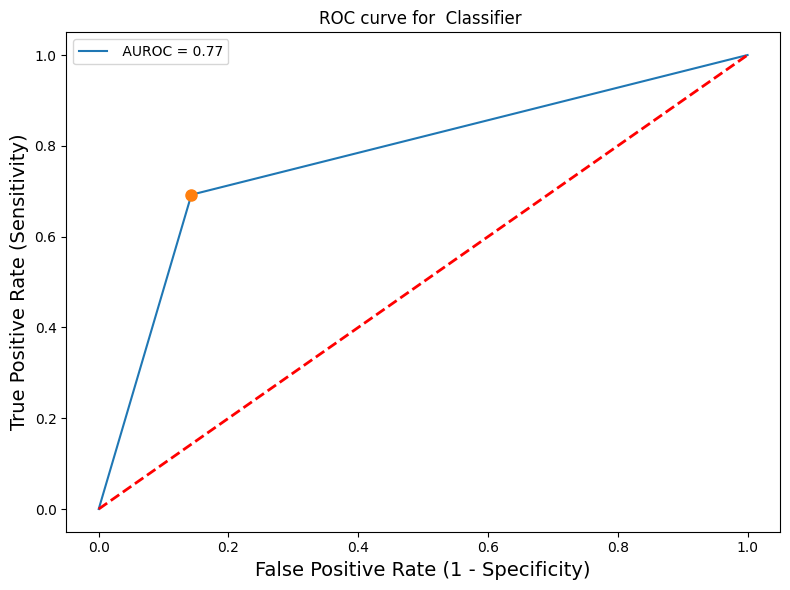

In [29]:
from sklearn.metrics import roc_curve, auc

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_new_test, clf_rf.predict(X_new_test))
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

In [30]:
live_birth_probabilities = clf_rf.predict_proba(X_new_test)[:, 1]


In [31]:
result_df = pd.DataFrame({
    'Patient age at treatment':ages_in_data,
    'Causes of infertility - tubal disease':  tubes,
    'Predicted Probability': live_birth_probabilities
})

# Display the result DataFrame
result_df


,Patient age at treatment,Causes of infertility - tubal disease,Predicted Probability
89,30,0,0.843333
54,38,0,0.000000
95,42,0,0.290476
98,41,0,0.440000
4,36,0,0.360000
93,39,0,0.120000
20,39,0,0.120000
1,35,0,0.680000
85,29,0,0.200000
73,23,0,0.040000
